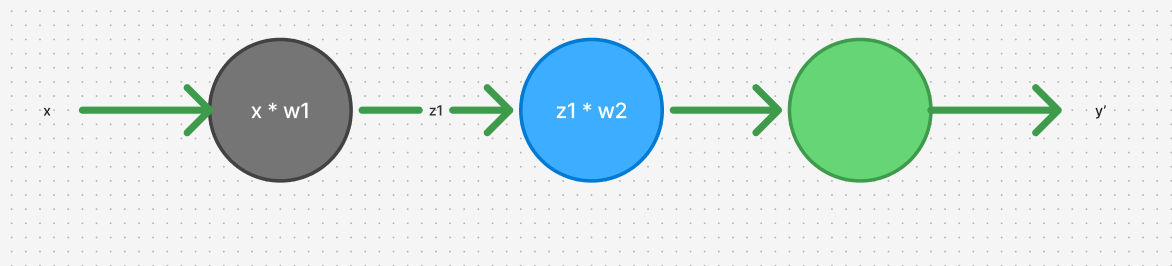

In [31]:
import numpy as np

def neuron_output(x1,x2, w1, w2, b):
    z = w1 * x1 + w2 * x2 + b
    return z

# Example inputs (e.g., hours studied, extra classes attended)

x1 = 5 # feature 1

x2 = 2 # feature 2

# Example weights and bias

w1 = 0.8

w2 = 1.2

b =-1.0

z = neuron_output(x1, x2, w1, w2, b) 
print("Linear combination (z):", z)

Linear combination (z): 5.4


- pass the output through a step function
- print a decision based on the output

- if the input is less than or equal to zero, output = 0
- otherwise output = 1

In [32]:
def activation(z):
    if z > 0:
        return 1
    return 0

y = activation(0) 

def output(y):
    if y == 0:
        print('Hell no, we wont going anywhere')
    else:
        print('Yeayyyy, Lets go!!!')

output(0)

Hell no, we wont going anywhere


In [33]:
output(activation(neuron_output(x1,x2, w1, w2, b)))

Yeayyyy, Lets go!!!


# MLP

- multi layer perceptron
- MLP Classifier

In [34]:
# Imports + load Iris dataset

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt 
import seaborn as sns

data = load_breast_cancer()

x = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")
print("X shape:", x.shape)
print("Class counts:\n", y.value_counts())
x.head()

X shape: (569, 30)
Class counts:
 target
1    357
0    212
Name: count, dtype: int64


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [35]:
x_train, x_test, y_train, y_test = train_test_split(
    x,y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
print('Train Size:',x_train.shape)
print('Test size:', x_test.shape)

Train Size: (455, 30)
Test size: (114, 30)


In [36]:
y_train

546    1
432    0
174    1
221    1
289    1
      ..
184    0
300    0
509    0
230    0
474    1
Name: target, Length: 455, dtype: int64

In [37]:
# Scale features (IMPORTANT for neural networks) 
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(x_train)

X_test_scaled = scaler.transform(x_test)

# Optional: quick check mean/std after scaling
print("After scaling (train):")
print("Mean (approx):", np.round (X_train_scaled.mean(axis=0), 3))
print("Std (approx):", np.round(X_train_scaled.std(axis=0), 3))

After scaling (train):
Mean (approx): [-0.  0. -0.  0.  0. -0. -0.  0. -0. -0.  0. -0.  0. -0. -0.  0.  0.  0.
  0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0.]
Std (approx): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [38]:
#Train an MLPClassifier (simple setup)

mlp = MLPClassifier(
hidden_layer_sizes=(10,),
activation="relu",
solver="adam",
max_iter=1000,      # max iterration
random_state=42     
)

mlp.fit(X_train_scaled,y_train)

#predict
mlp_predict = mlp.predict(X_test_scaled)

#accuracy
acc = accuracy_score(y_test,mlp_predict)

print('=== MLPCLassifier on Breast Cancer ===')
print('Test accuracy:', round(acc,4))

=== MLPCLassifier on Breast Cancer ===
Test accuracy: 0.9649


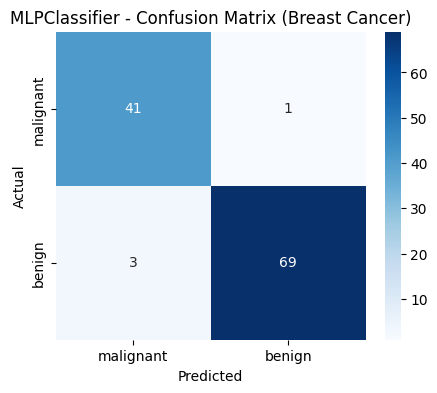

              precision    recall  f1-score   support

   malignant       0.93      0.98      0.95        42
      benign       0.99      0.96      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [39]:
# Confusion matrix + classification report

cm = confusion_matrix(y_test, mlp_predict)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt= "d", cmap='Blues',
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.title("MLPClassifier - Confusion Matrix (Breast Cancer)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, mlp_predict, target_names=data.target_names))

# Exercise

In [ ]:
mlp = MLPClassifier(
hidden_layer_sizes=(20,15),
activation="tanh",
solver="adam",
max_iter=100,      # max iterration
random_state=42     
)

mlp.fit(X_train_scaled,y_train)

#predict
mlp_predict = mlp.predict(X_test_scaled)

#accuracy
acc = accuracy_score(y_test,mlp_predict)

print('=== MLPCLassifier on Breast Cancer ===')
print('Test accuracy:', round(acc,4))

=== MLPCLassifier on Breast Cancer ===
Test accuracy: 0.9737


C:\Users\User\AppData\Roaming\Python\Python314\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
